In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


## Loading the data set

In [2]:
train= pd.read_csv("../input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test= pd.read_csv("../input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y_train= train["label"]
X_train= train.drop(labels= ["label"], axis=1)
# train datasının label sütunu Y_train' atansın 
# train datasından label sütununun çıkarılmış hali X_train'e atılsın

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

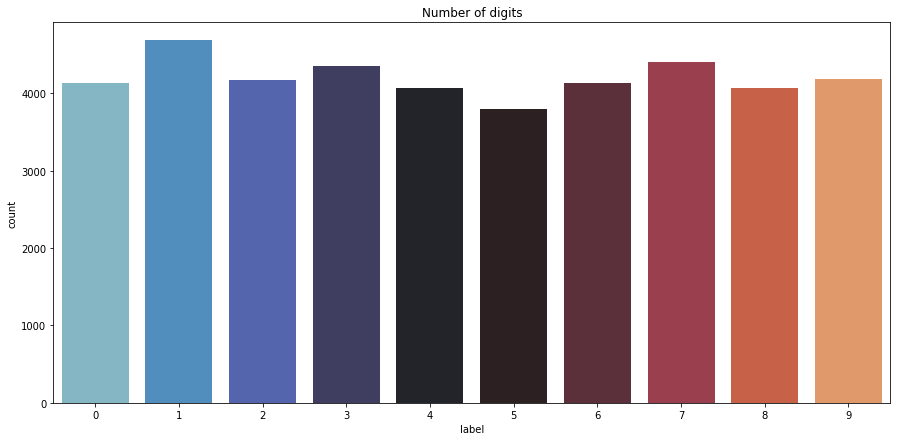

In [5]:
plt.figure(figsize=(15,7))
g= sns.countplot(Y_train, palette="icefire")
plt.title("Number of digits")
Y_train.value_counts()

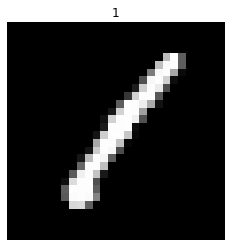

In [6]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

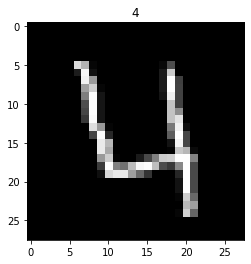

In [7]:
img= X_train.iloc[3].to_numpy()
img= img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("on")
plt.show()

## Normalization, Reshape and Label Encoding

#### Normalization
* Bir resmi normalize etmek demek onu gray scale içerisine almak demektir. Yani görsel siyah ve beyazdan oluşacaktır.
* Normalization yaparak CNN'in daha hızlı çalışmasını sağlarız.
<br>
<br>

#### Reshape
* Keras elimizde bulunan 28x28 yani 2 boyutlu matrisleri anlamlandıramaz.
* Bu yüzden 3D olarak kullanmalıyız. 28x28x1 , buradaki 1'in anlamı siyah beyaz olmasıdır yani gray scale'i temsil eder, renkli olsaydı 3 verilecekti. Çünkü RGB 3 renk değerine sahiptir.
<br>
<br>

#### Label Encoding
* Verideki label'larımızın binary temsil edilişi
    * 2 = [0,0,1,0,0,0,0,0,0,0]
    * 4 = [0,0,0,0,1,0,0,0,0,0]
* Örneğin 2 , 3.indexte bulunmaktadır. Çünkü indexleme 0.dan başlıyor.
* Encoding demek Label'ları farklı bir formata çevirmek anlamına gelmektedir.

In [8]:
# Normalize the data
# Normalization bir değeri 0-1 aralığına almak anlamına gelmektedir.
# Bu veri setinde resimler ile çalışıldığı için veriyi 255'e bölmek yeterli olacaktır çünkü
# bir resmin alabileceği max matematiksel değer 255'tir.
# Örneğin kırmızı rengin rgb kodu (255,0,0) maxiimum 255 değerini almıştır.
# bu yüzden x_train ve test'i 255'e bölerek normalize etmiş oluyoruz.

X_train= X_train/255.0
test= test/ 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ", test.shape)

# normalize etmek shape'te bir değişikliğe neden olmamaktadır.

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [9]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test= test.values.reshape(-1,28,28,1)
print("x_train shape:", X_train.shape)
print("test shape: ", test.shape)

# kaç sample olduğunu belirten bir değeri de içine alarak 4D'ye çeviriyoruz.

x_train shape: (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [10]:
# Label Encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train, num_classes= 10)
# encoding yapılırken number of class belirtilmek zorunda

## Train Test Split
* test size is 10% , train size ise 90% .

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_val shape",Y_val.shape)

# x_train ve x_validation olarak ayırdık
# x_train ile model oluşturacaz
# x_val ile model test edilecek
# gerçek hayatta kullanmaya hazır bir model elde edilecek 
# test ile de bu model test edilecek

x_train shape (37800, 28, 28, 1)
x_val shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_val shape (4200, 10)


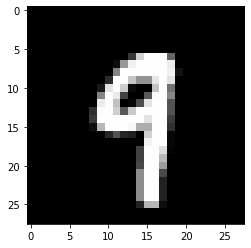

In [12]:
plt.imshow(X_train[2][:,:,0], cmap='gray')
plt.show()